In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageChops

In [2]:
train = pd.read_csv('/Users/kaivuxu/Downloads/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
rownum=6875

In [4]:
if rownum > -1 and rownum < 60000:
    pixels = train.iloc[rownum][1:].values.reshape(28,28)
    array = np.array(pixels,dtype=np.uint8)
    img = Image.fromarray(array)
else:
    print('wrong')

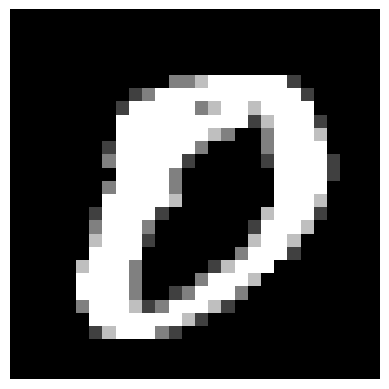

In [5]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
gray_img = img.convert('L')

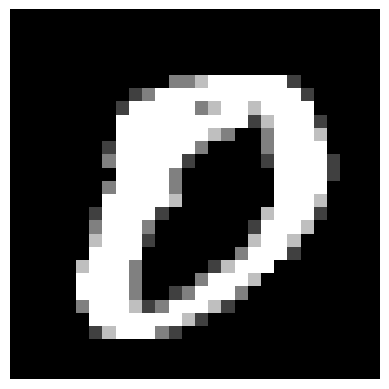

In [7]:
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

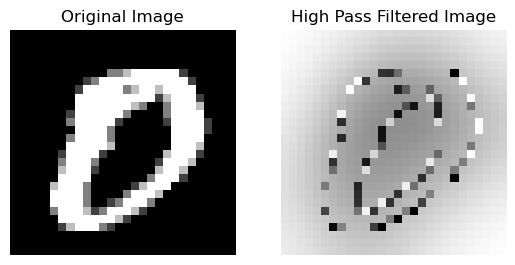

In [9]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Function to apply High Pass Filter
def high_pass_filter(img):
    # Apply a low pass filter (Gaussian blur)
    low_pass_img = img.filter(ImageFilter.GaussianBlur(radius=5))  # You can adjust the radius
    
    # Convert both images to arrays
    img_array = np.array(img)
    low_pass_array = np.array(low_pass_img)
    
    # High Pass Filter = Original Image - Low Pass Image
    high_pass_array = img_array - low_pass_array
    
    # Clip the values to stay within the valid range [0, 255]
    high_pass_array = np.clip(high_pass_array, 0, 255)
    
    # Convert back to an image
    high_pass_img = Image.fromarray(high_pass_array.astype(np.uint8))
    return high_pass_img



# Apply High Pass Filter
high_pass_img = high_pass_filter(gray_img)

# Display the original and high-pass filtered images
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass_img, cmap='gray')
plt.title("High Pass Filtered Image")
plt.axis('off')

plt.show()


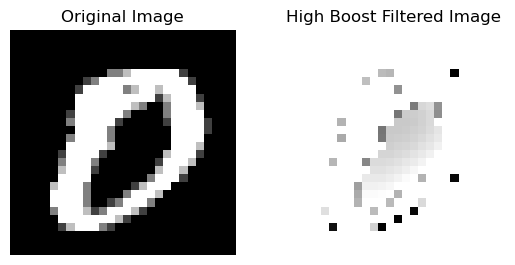

In [10]:
# Function to apply High Boost Filter
def high_boost_filter(img, boost_factor=1.5):
    # Apply a low pass filter (Gaussian blur)
    low_pass_img = img.filter(ImageFilter.GaussianBlur(radius=5))  # Adjust the radius as needed
    
    # Convert both images to arrays
    img_array = np.array(img)
    low_pass_array = np.array(low_pass_img)
    
    # High Pass Filter = Original Image - Low Pass Image
    high_pass_array = img_array - low_pass_array
    
    # High Boost Filter = Original Image + Boost Factor * High Pass Filter
    high_boost_array = img_array + boost_factor * high_pass_array
    
    # Clip the values to stay within the valid range [0, 255]
    high_boost_array = np.clip(high_boost_array, 0, 255)
    
    # Convert back to an image
    high_boost_img = Image.fromarray(high_boost_array.astype(np.uint8))
    return high_boost_img

# Apply High Boost Filter
high_boost_img = high_boost_filter(gray_img)

# Display the original and high-boost filtered images
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_boost_img, cmap='gray')
plt.title("High Boost Filtered Image")
plt.axis('off')

plt.show()
